In [92]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

Her er den første forskjellen mellom Pandass og Polars. Hvis jeg hadde brukt 
```Python
pl.read_csv()
```
Hadde den blitt evaluert med *eager* evaluering, men jeg bruker *lazy*.
```Python
    .collect()
```
er ikke nødvendig, den samler alt for å kunne bruke den. Om jeg var mer kjent med *lazy APIen* hadde jeg vist mer om når jeg skulle bruke den, men jeg vet ikke, og dette virket. Jeg gjør også *Release date* kolonen om til en datetime objekt inn i lesingen. 

In [93]:
data = (pl.scan_csv("games.csv")
        .with_columns(
                pl.col("Release date").str.replace(r"(\w{3} \d{4})", r"\1 1").str.strptime(pl.Date, "%b %d, %Y", strict=False),
        )
        .collect()
        )

data.head()

AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
i64,str,date,str,i64,i64,f64,i64,i64,str,str,str,str,str,str,str,str,bool,bool,bool,i64,str,i64,i64,i64,str,i64,i64,str,i64,i64,i64,i64,str,str,str,str,str,str,str
20200,"""Galactic Bowling""",2008-10-21,"""0 - 20000""",0,0,19.99,0,0,"""Galactic Bowling is an exagger…","""['English']""","""[]""","""""","""https://cdn.akamai.steamstatic…","""http://www.galacticbowling.net""","""""","""""",true,false,false,0,"""""",0,6,11,"""""",30,0,"""""",0,0,0,0,"""Perpetual FX Creative""","""Perpetual FX Creative""","""Single-player,Multi-player,Ste…","""Casual,Indie,Sports""","""Indie,Casual,Sports,Bowling""","""https://cdn.akamai.steamstatic…","""http://cdn.akamai.steamstatic.…"
655370,"""Train Bandit""",2017-10-12,"""0 - 20000""",0,0,0.99,0,0,"""THE LAW!! Looks to be a showdo…","""['English', 'French', 'Italian…","""[]""","""""","""https://cdn.akamai.steamstatic…","""http://trainbandit.com""","""""","""support@rustymoyher.com""",true,true,false,0,"""""",0,53,5,"""""",12,0,"""""",0,0,0,0,"""Rusty Moyher""","""Wild Rooster""","""Single-player,Steam Achievemen…","""Action,Indie""","""Indie,Action,Pixel Graphics,2D…","""https://cdn.akamai.steamstatic…","""http://cdn.akamai.steamstatic.…"
1732930,"""Jolt Project""",2021-11-17,"""0 - 20000""",0,0,4.99,0,0,"""Jolt Project: The army now has…","""['English', 'Portuguese - Braz…","""[]""","""""","""https://cdn.akamai.steamstatic…","""""","""""","""ramoncampiaof31@gmail.com""",true,false,false,0,"""""",0,0,0,"""""",0,0,"""""",0,0,0,0,"""Campião Games""","""Campião Games""","""Single-player""","""Action,Adventure,Indie,Strateg…","""""","""https://cdn.akamai.steamstatic…","""http://cdn.akamai.steamstatic.…"
1355720,"""Henosis™""",2020-07-23,"""0 - 20000""",0,0,5.99,0,0,"""HENOSIS™ is a mysterious 2D Pl…","""['English', 'French', 'Italian…","""[]""","""""","""https://cdn.akamai.steamstatic…","""https://henosisgame.com/""","""https://henosisgame.com/""","""info@henosisgame.com""",true,true,true,0,"""""",0,3,0,"""""",0,0,"""""",0,0,0,0,"""Odd Critter Games""","""Odd Critter Games""","""Single-player,Full controller …","""Adventure,Casual,Indie""","""2D Platformer,Atmospheric,Surr…","""https://cdn.akamai.steamstatic…","""http://cdn.akamai.steamstatic.…"
1139950,"""Two Weeks in Painland""",2020-02-03,"""0 - 20000""",0,0,0.0,0,0,"""ABOUT THE GAME Play as a hacke…","""['English', 'Spanish - Spain']""","""[]""","""""","""https://cdn.akamai.steamstatic…","""https://www.unusual-games.com/…","""https://www.unusual-games.com/…","""welistentoyou@unusual-games.co…",true,true,false,0,"""""",0,50,8,"""""",17,0,"""This Game may contain content …",0,0,0,0,"""Unusual Games""","""Unusual Games""","""Single-player,Steam Achievemen…","""Adventure,Indie""","""Indie,Adventure,Nudity,Violent…","""https://cdn.akamai.steamstatic…","""http://cdn.akamai.steamstatic.…"


In [94]:
dataWithoutUnplayedGames = data.filter(pl.col("Peak CCU") > 0)

In [95]:
dataWithoutUnplayedGames.columns

['AppID',
 'Name',
 'Release date',
 'Estimated owners',
 'Peak CCU',
 'Required age',
 'Price',
 'Discount',
 'DLC count',
 'About the game',
 'Supported languages',
 'Full audio languages',
 'Reviews',
 'Header image',
 'Website',
 'Support url',
 'Support email',
 'Windows',
 'Mac',
 'Linux',
 'Metacritic score',
 'Metacritic url',
 'User score',
 'Positive',
 'Negative',
 'Score rank',
 'Achievements',
 'Recommendations',
 'Notes',
 'Average playtime forever',
 'Average playtime two weeks',
 'Median playtime forever',
 'Median playtime two weeks',
 'Developers',
 'Publishers',
 'Categories',
 'Genres',
 'Tags',
 'Screenshots',
 'Movies']

In [96]:
def estimate_middle_value(numbers):
    if type(numbers) == int:
        return numbers

    numbers = numbers.replace(" - ", " ")
    lower, upper = map(int, numbers.split())
    return (upper + lower) / 2

dataWithoutUnplayedGames = dataWithoutUnplayedGames.with_columns(
    pl.col("Estimated owners").map_elements(estimate_middle_value, return_dtype=float).alias("Estimated owners middle value")
)

dataWithoutUnplayedGames["Estimated owners middle value"]

Estimated owners middle value
f64
75000.0
10000.0
10000.0
10000.0
35000.0
…
10000.0
10000.0
10000.0


In [97]:
dataWithoutUnplayedGames.row(0)

(1469160,
 'Wartune Reborn',
 datetime.date(2021, 2, 26),
 '50000 - 100000',
 68,
 0,
 0.0,
 0,
 0,
 "Feel tired of auto-fight? Feel tired of boring numerical combinations? Let us try this amazing and exciting game! Right! Wartune Reborn is the super popular magic epic game as we know. Now, the magnificent magic epic game restarts, reminds you the classical plays and brings great experience. In Cloud City, you are going to maintains the Wartune movement, fighting the abyss monsters to protect the world from chaos. Don't be nervous! With protection of Dinah, Priestess of Light, you will have the power to absorb the chord, incorporate those forces without kings into your own ones, and make contract with and train apotheosis of Sylphs. You can improve yourself in a series of RPG adventures including instances battles, wild fighting, occupation and plunder. At the same time, you can run your own ligeance and castles and ally yourself with other players in the world who attack the Chaos. Al

In [98]:
genres = {}
genreSales = {}
categories = {}
categorySales = {}

for i in dataWithoutUnplayedGames.iter_rows(named=True):
    genresUsed = str(i["Genres"]).strip().split(",")
    categoriesUsed = str(i["Categories"]).strip().split(",")

    for j in genresUsed:
        if j == "nan":
            j = "None"
            
        if j not in genreSales.keys():
            genreSales[j] = i["Estimated owners middle value"]  
        else: 
            genreSales[j] += i["Estimated owners middle value"]

    for j in categoriesUsed:
        if j == "nan":
            j = "None"

        if j not in categorySales.keys():
            categorySales[j] = i["Estimated owners middle value"]  
        else: 
            categorySales[j] += i["Estimated owners middle value"]

for i in data.iter_rows(named=True):
    genresUsed = str(i["Genres"]).strip().split(",")
    categoriesUsed = str(i["Categories"]).strip().split(",")

    for j in genresUsed:
        if j == "nan":
            j = "None"

        if j not in genres.keys():
            genres[j] = 1
        else: 
            genres[j] += 1

    for j in categoriesUsed:
        if j == "nan":
            j = "None"

        if j not in categories.keys():
            categories[j] = 1
        else: 
            categories[j] += 1

genres = dict(sorted(genres.items(), key=lambda item: item[1]))
genreSales = dict(sorted(genreSales.items(), key=lambda item: item[1]))
categories = dict(sorted(categories.items(), key=lambda item: item[1]))
categorySales = dict(sorted(categorySales.items(), key=lambda item: item[1]))

print(genres)
print(genreSales)

{'Documentary': 1, 'Episodic': 1, 'Tutorial': 1, '360 Video': 1, 'Movie': 2, 'Short': 2, 'Accounting': 26, 'Sexual Content': 108, 'Web Publishing': 115, 'Nudity': 120, 'Photo Editing': 150, 'Software Training': 218, 'Audio Production': 218, 'Game Development': 259, 'Gore': 311, 'Video Production': 317, 'Free To Play': 323, 'Education': 419, 'Animation & Modeling': 442, 'Violent': 527, 'Design & Illustration': 538, 'Utilities': 925, 'Massively Multiplayer': 2422, 'Racing': 3482, 'Sports': 4262, '': 4841, 'Free to Play': 7920, 'Early Access': 12097, 'RPG': 16657, 'Strategy': 17760, 'Simulation': 18608, 'Adventure': 35864, 'Action': 38004, 'Casual': 39308, 'Indie': 64501}
{'Free To Play': 10000.0, 'Accounting': 310000.0, 'Sexual Content': 620000.0, 'Movie': 750000.0, 'Nudity': 2000000.0, 'Education': 2715000.0, 'Game Development': 3755000.0, 'Software Training': 4045000.0, 'Audio Production': 4585000.0, 'Web Publishing': 4710000.0, 'Gore': 5500000.0, 'Violent': 8160000.0, '': 10655000.0, 

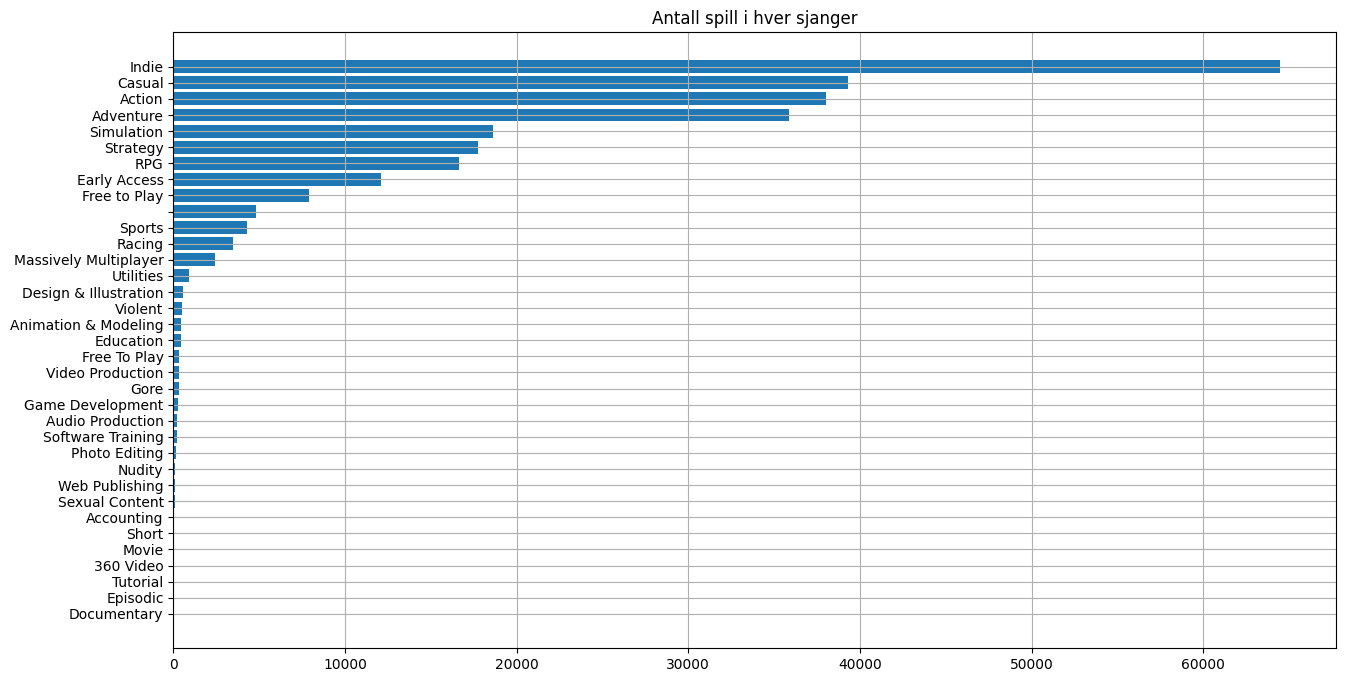

In [99]:
plt.barh(genres.keys(), genres.values())
plt.gcf().set_size_inches(15, 8)
plt.title("Antall spill i hver sjanger")
plt.grid()

plt.savefig("visualiseringer/antallSjanger.png")

plt.show()

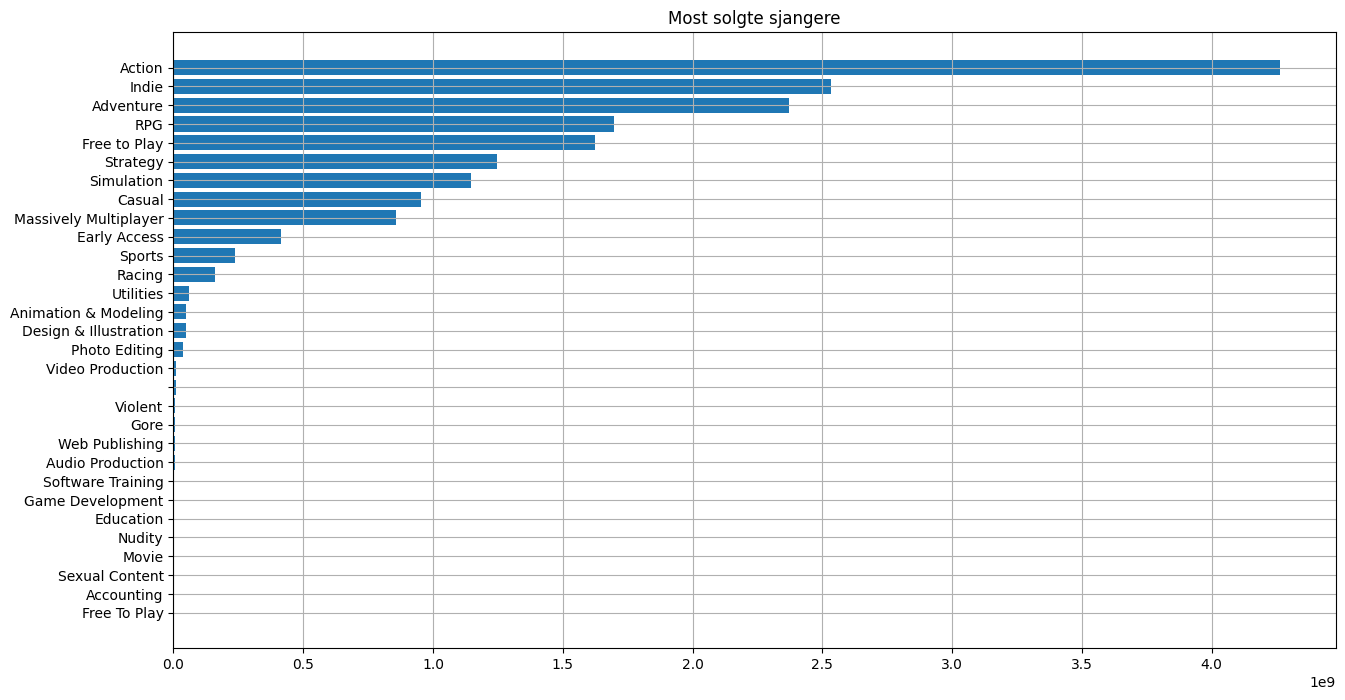

In [100]:
plt.barh(genreSales.keys(), genreSales.values())
plt.gcf().set_size_inches(15, 8)
plt.title("Most solgte sjangere")
plt.grid()

plt.savefig("visualiseringer/mestSolgtSjanger.png")

plt.show()

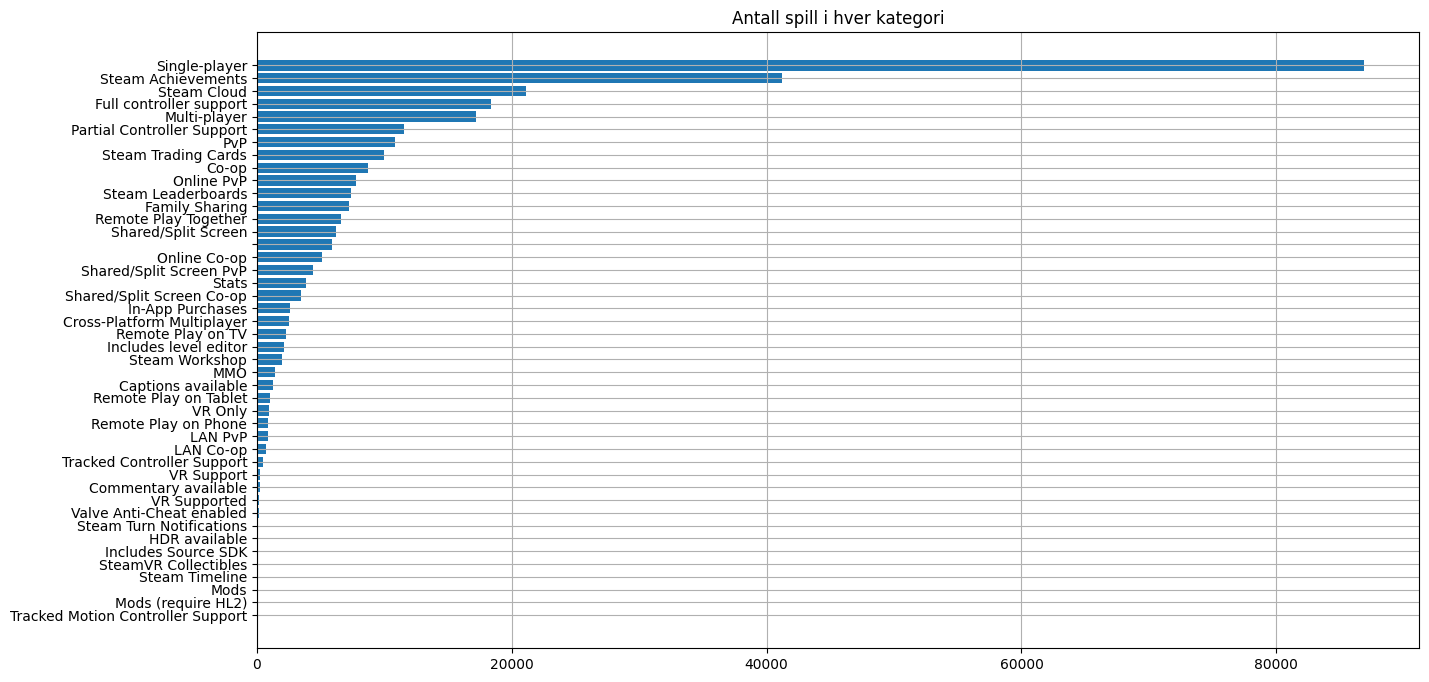

In [101]:
plt.barh(categories.keys(), categories.values())
plt.gcf().set_size_inches(15, 8)
plt.title("Antall spill i hver kategori")
plt.grid()

plt.savefig("visualiseringer/antallKategorier.png")

plt.show()

([<matplotlib.patches.Wedge at 0x23f0ab44260>,
 [Text(1.09999999999828, 1.945375947797297e-06, 'Free To Play'),
  Text(1.0999999981266788, 6.41974059907901e-05, 'Accounting'),
  Text(1.0999999726897616, 0.0002451173678942597, 'Sexual Content'),
  Text(1.0999998810139933, 0.0005116338540725204, 'Movie'),
  Text(1.0999995020922153, 0.0010466120954985426, 'Nudity'),
  Text(1.0999982469396576, 0.001963855819597347, 'Education'),
  Text(1.0999952797289343, 0.0032225105219077046, 'Game Development'),
  Text(1.0999897878660228, 0.004739893507480137, 'Software Training'),
  Text(1.0999812725194362, 0.006418730912110451, 'Audio Production'),
  Text(1.099969234946739, 0.008226917447363109, 'Web Publishing'),
  Text(1.099952586743035, 0.010213075800449476, 'Gore'),
  Text(1.0999247042551705, 0.012870313483982909, 'Violent'),
  Text(1.0998757894466382, 0.01653020838146647, ''),
  Text(1.0998026526211115, 0.020835673436842072, 'Video Production'),
  Text(1.0995794592975792, 0.03041402128695766, 'Ph

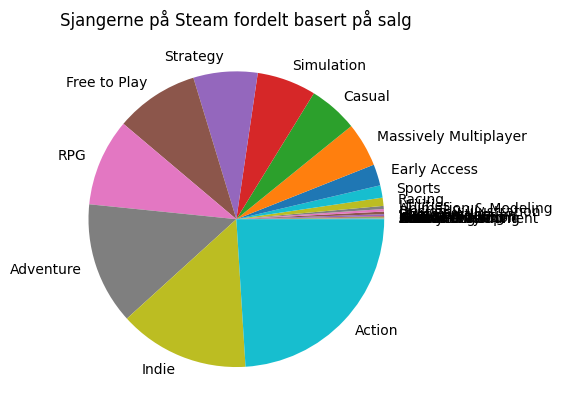

In [ ]:
plt.title("Sjangerne på Steam fordelt basert på salg")

plt.pie(genreSales.values(), labels=genreSales.keys(), autopct='%1.1f%%')
plt.savefig("visualiseringer/sjangereSolgt")

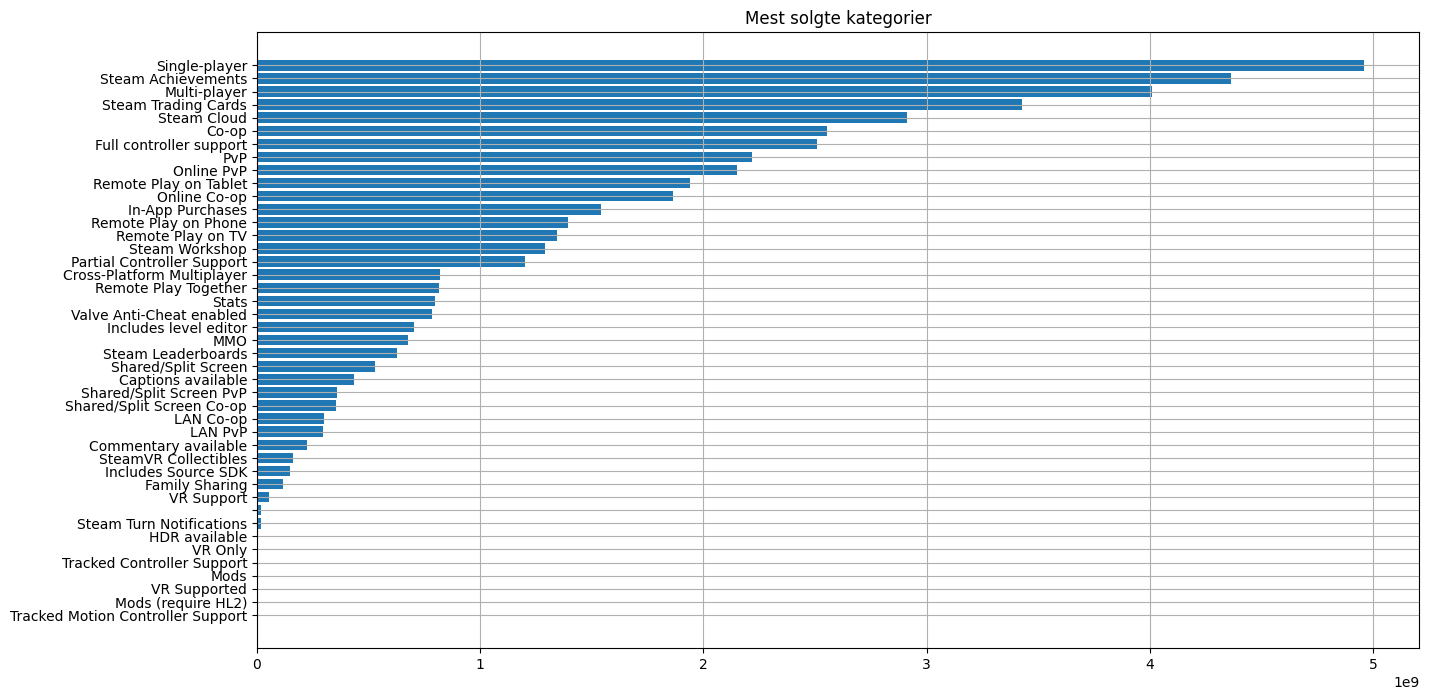

In [103]:
plt.barh(categorySales.keys(), categorySales.values())
plt.gcf().set_size_inches(15, 8)
plt.title("Mest solgte kategorier")
plt.grid()

plt.savefig("visualiseringer/mestSolgtKategori.png")

plt.show()

In [104]:
top50Spill = dataWithoutUnplayedGames.sort("Estimated owners middle value", descending=True).head(50)
top50Spill.head

<bound method DataFrame.head of shape: (50, 41)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ AppID   ┆ Name       ┆ Release   ┆ Estimated ┆ … ┆ Tags      ┆ Screensho ┆ Movies    ┆ Estimated │
│ ---     ┆ ---        ┆ date      ┆ owners    ┆   ┆ ---       ┆ ts        ┆ ---       ┆ owners    │
│ i64     ┆ str        ┆ ---       ┆ ---       ┆   ┆ str       ┆ ---       ┆ str       ┆ middle    │
│         ┆            ┆ date      ┆ str       ┆   ┆           ┆ str       ┆           ┆ value     │
│         ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆ ---       │
│         ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64       │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 570     ┆ Dota 2     ┆ 2013-07-0 ┆ 100000000 ┆ … ┆ Free to   ┆ https://c ┆ http://cd ┆ 1.5e8     │
│         ┆            ┆ 9         ┆ -     

Her ser vi noe interessant med **Pandas**/**Polars**: de sorterer på forskjellige måter. Her er alt på riktig nivå, men det er variasjon i hvordan det er sortert innen nivåene. 

C:\Users\thass\AppData\Local\Temp\ipykernel_6920\1184689827.py:6: UserWarning: Glyph 39740 (\N{CJK UNIFIED IDEOGRAPH-9B3C}) missing from font(s) DejaVu Sans.
  plt.savefig("visualiseringer/mestSolgteSpill.png")
C:\Users\thass\AppData\Local\Temp\ipykernel_6920\1184689827.py:6: UserWarning: Glyph 35895 (\N{CJK UNIFIED IDEOGRAPH-8C37}) missing from font(s) DejaVu Sans.
  plt.savefig("visualiseringer/mestSolgteSpill.png")
C:\Users\thass\AppData\Local\Temp\ipykernel_6920\1184689827.py:6: UserWarning: Glyph 20843 (\N{CJK UNIFIED IDEOGRAPH-516B}) missing from font(s) DejaVu Sans.
  plt.savefig("visualiseringer/mestSolgteSpill.png")
C:\Users\thass\AppData\Local\Temp\ipykernel_6920\1184689827.py:6: UserWarning: Glyph 33618 (\N{CJK UNIFIED IDEOGRAPH-8352}) missing from font(s) DejaVu Sans.
  plt.savefig("visualiseringer/mestSolgteSpill.png")
C:\Users\thass\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39740 (\N{CJK UNIFIED IDEOGRAPH-9B3C}) miss

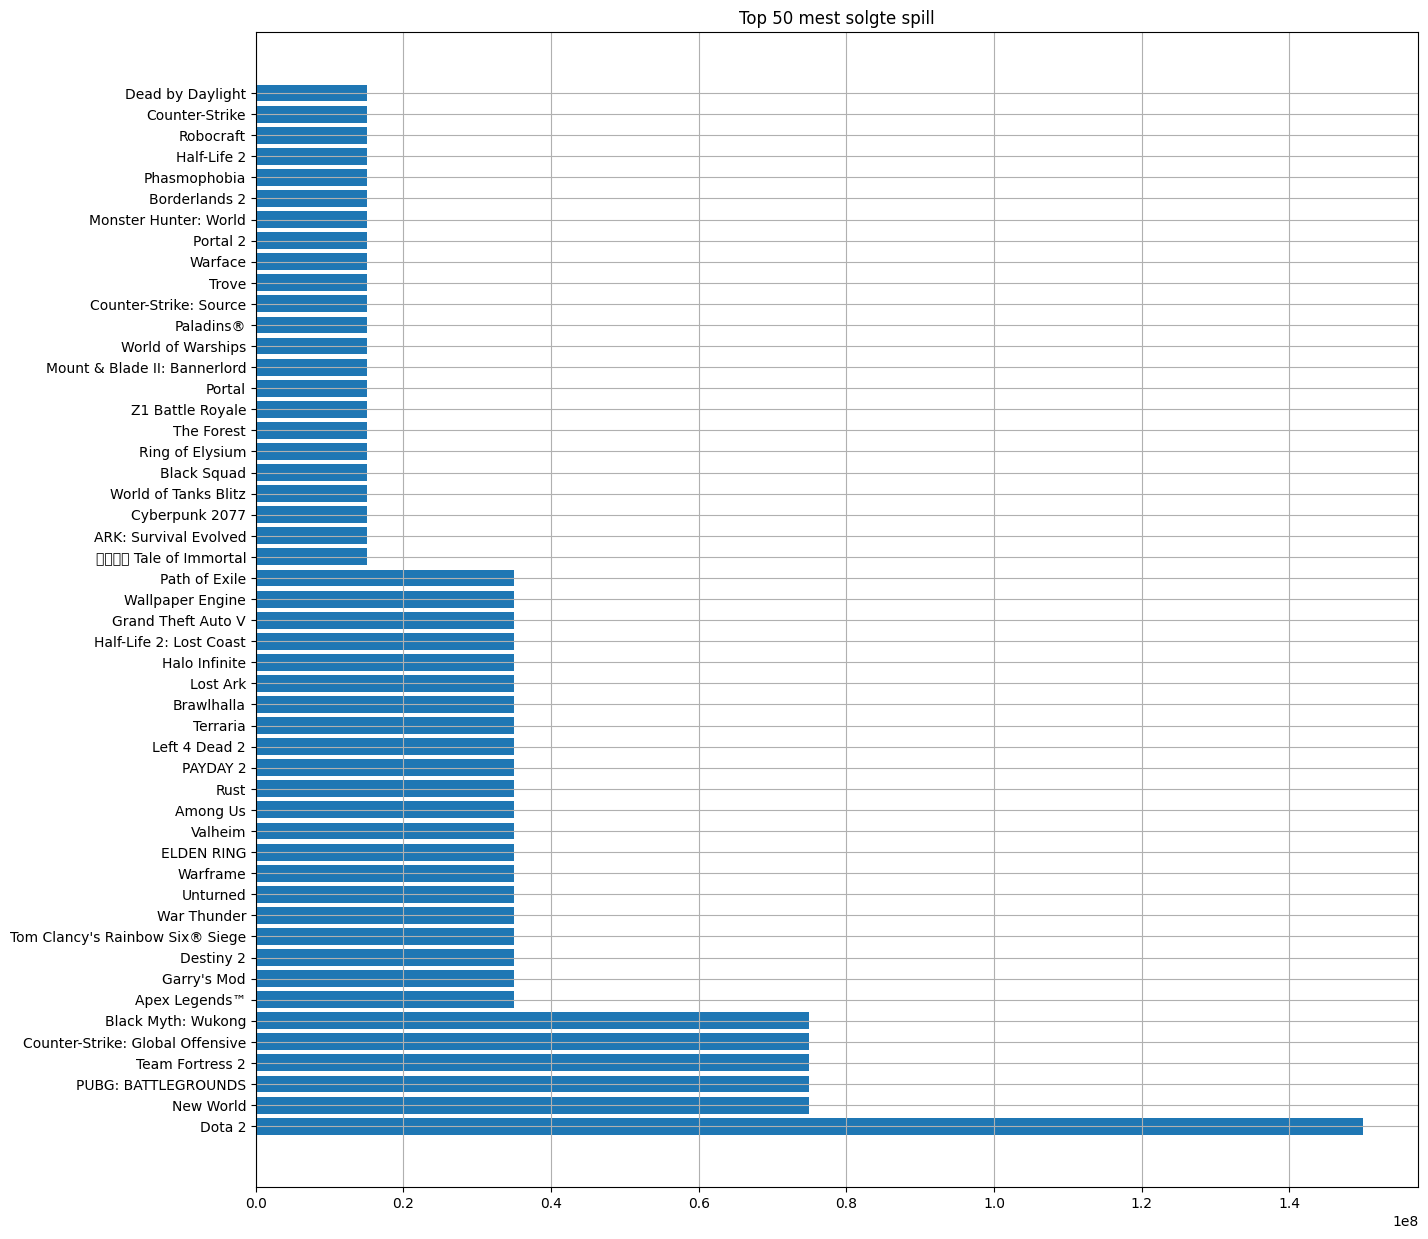

In [105]:
plt.barh(top50Spill["Name"], top50Spill["Estimated owners middle value"])
plt.gcf().set_size_inches(15, 15)
plt.title("Top 50 mest solgte spill")
plt.grid()

plt.savefig("visualiseringer/mestSolgteSpill.png")

plt.show()

In [106]:
top50StørstCCU = dataWithoutUnplayedGames.sort("Peak CCU", descending=True).head(50)

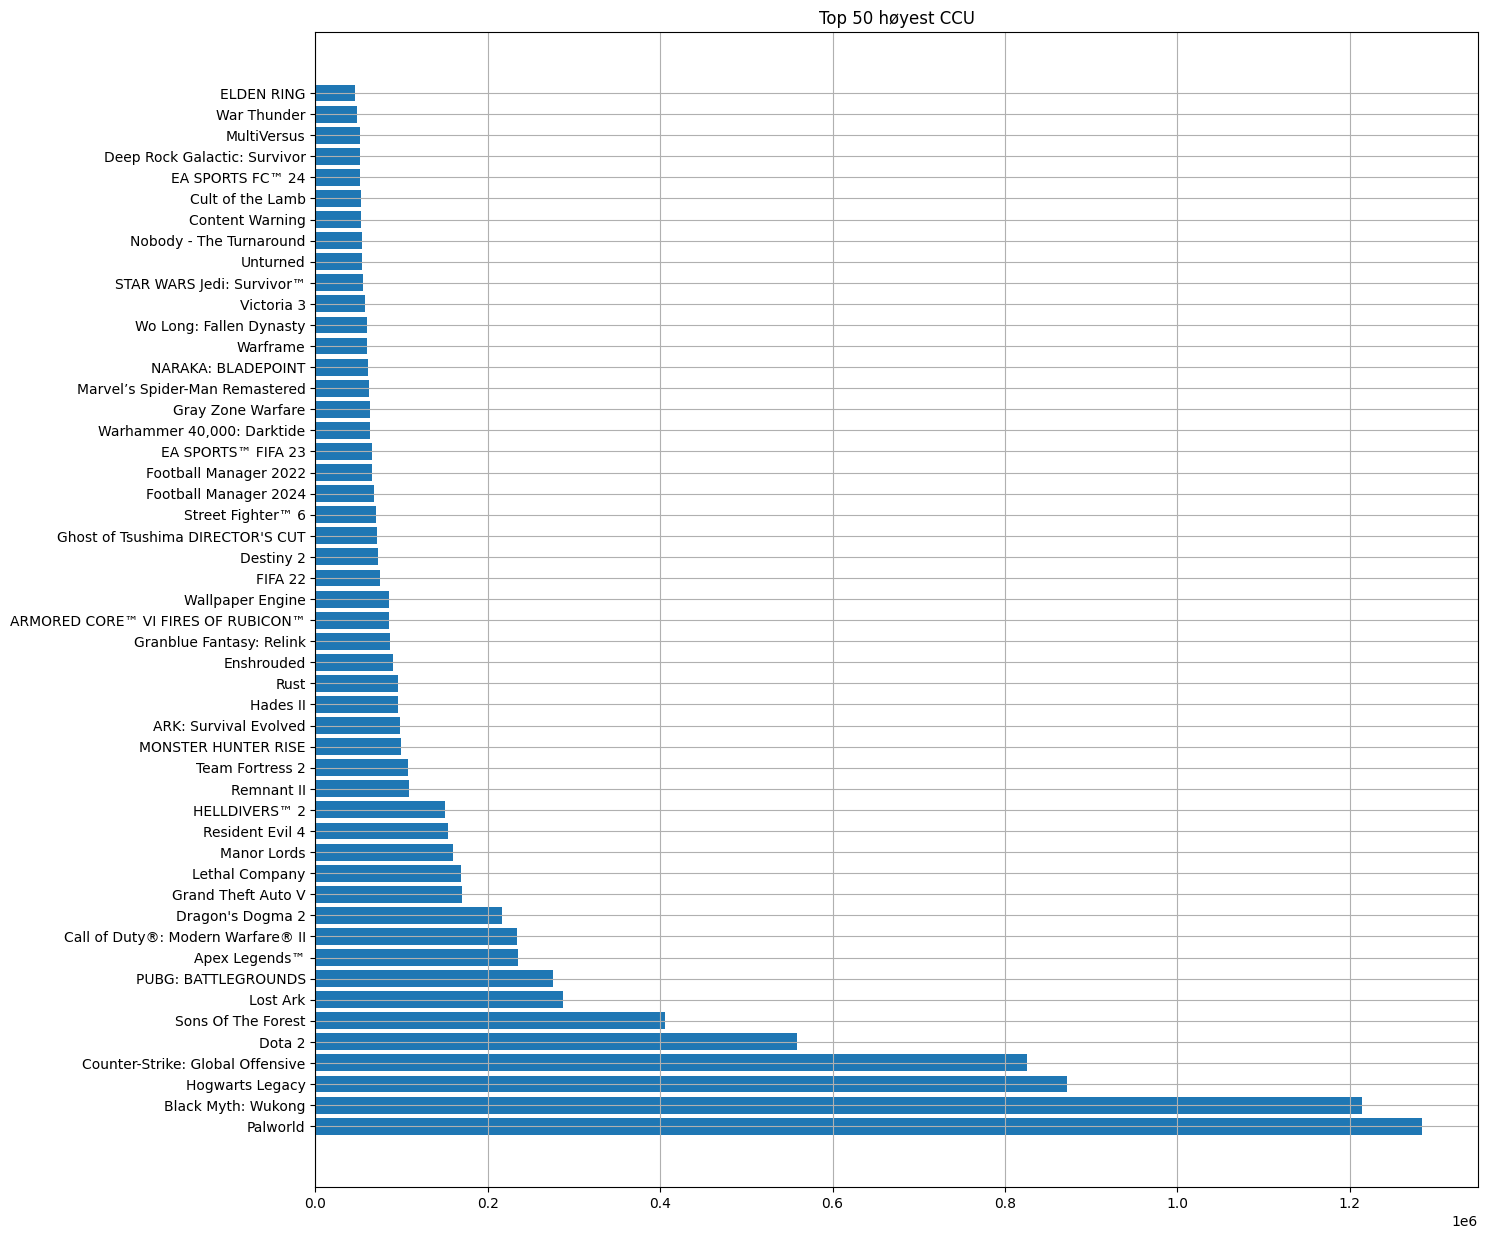

In [107]:
plt.barh(top50StørstCCU["Name"], top50StørstCCU["Peak CCU"])
plt.gcf().set_size_inches(15, 15)
plt.title("Top 50 høyest CCU")
plt.grid()

plt.savefig("visualiseringer/toppCCU.png")

plt.show()

In [108]:
steamGamesOverTime = {}

for i in data["Release date"]:
    if i is None:
        continue
    else: 
        year = i.year

    if year in steamGamesOverTime:
        steamGamesOverTime[year] += 1
    else:
        steamGamesOverTime[year] = 1
    
steamGamesOverTime = dict(sorted(steamGamesOverTime.items()))
print(steamGamesOverTime)

{1997: 2, 1998: 1, 1999: 3, 2000: 2, 2001: 4, 2002: 1, 2003: 3, 2004: 7, 2005: 7, 2006: 69, 2007: 109, 2008: 176, 2009: 339, 2010: 300, 2011: 286, 2012: 356, 2013: 490, 2014: 1627, 2015: 2683, 2016: 4407, 2017: 6324, 2018: 8166, 2019: 7810, 2020: 9631, 2021: 12374, 2022: 13979, 2023: 15542, 2024: 12579, 2025: 2}


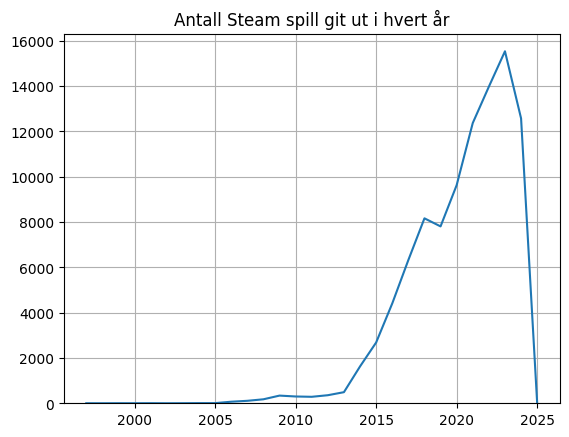

In [109]:
plt.plot(steamGamesOverTime.keys(), steamGamesOverTime.values())
plt.title("Antall Steam spill git ut i hvert år")
plt.ylim(bottom=0)

plt.grid()

plt.savefig("visualiseringer/spillHvertÅr.png")

plt.show()

In [110]:
without2025 = steamGamesOverTime.copy()
without2025.pop(2025)

2

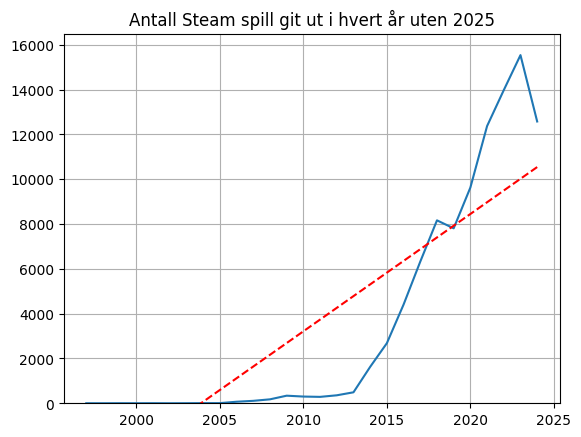

In [111]:
plt.plot(without2025.keys(), without2025.values())
plt.title("Antall Steam spill git ut i hvert år uten 2025")

z = np.polyfit(list(without2025.keys()), list(without2025.values()), 1)
p = np.poly1d(z)

plt.plot(without2025.keys(), p(list(without2025.keys())), "r--")
plt.ylim(bottom=0)

plt.grid()

plt.savefig("visualiseringer/spillHvertÅrUten2025.png")

plt.show()

In [112]:
cumultativeSteamGames = {k: v for k, v in zip(range(list(steamGamesOverTime.keys())[0], list(steamGamesOverTime.keys())[-1] + 1), np.cumsum(list(steamGamesOverTime.values())))}
cumultativeSteamGames

{1997: np.int64(2),
 1998: np.int64(3),
 1999: np.int64(6),
 2000: np.int64(8),
 2001: np.int64(12),
 2002: np.int64(13),
 2003: np.int64(16),
 2004: np.int64(23),
 2005: np.int64(30),
 2006: np.int64(99),
 2007: np.int64(208),
 2008: np.int64(384),
 2009: np.int64(723),
 2010: np.int64(1023),
 2011: np.int64(1309),
 2012: np.int64(1665),
 2013: np.int64(2155),
 2014: np.int64(3782),
 2015: np.int64(6465),
 2016: np.int64(10872),
 2017: np.int64(17196),
 2018: np.int64(25362),
 2019: np.int64(33172),
 2020: np.int64(42803),
 2021: np.int64(55177),
 2022: np.int64(69156),
 2023: np.int64(84698),
 2024: np.int64(97277),
 2025: np.int64(97279)}

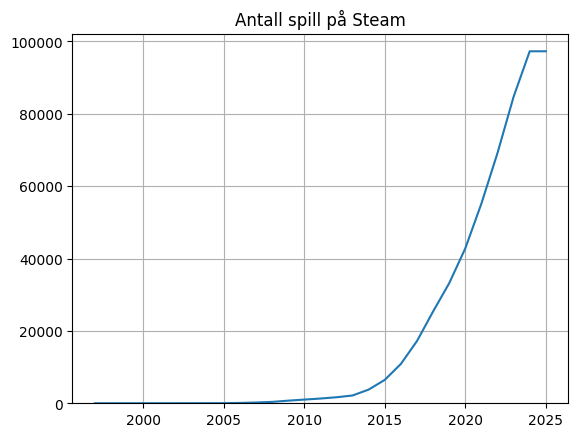

In [113]:
plt.plot(cumultativeSteamGames.keys(), cumultativeSteamGames.values())
plt.grid()
plt.ylim(bottom = 0)
plt.title("Antall spill på Steam")

plt.savefig("visualiseringer/antallSpill.png")

plt.show()

In [114]:
without2025CumSum = cumultativeSteamGames.copy()
without2025CumSum.pop(2025)

np.int64(97279)

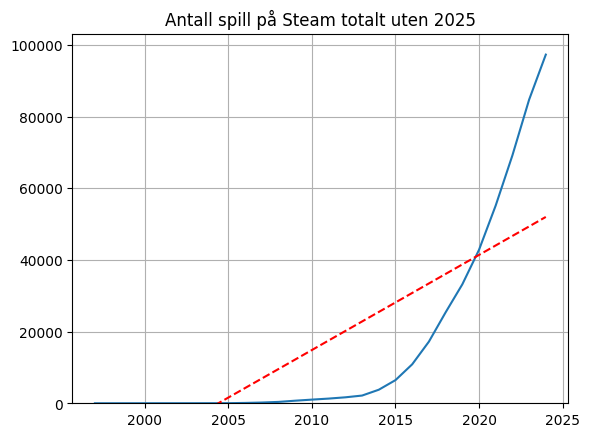

In [115]:
plt.plot(without2025CumSum.keys(), without2025CumSum.values())
plt.title("Antall spill på Steam totalt uten 2025")

z = np.polyfit(list(without2025CumSum.keys()), list(without2025CumSum.values()), 1)
p = np.poly1d(z)

plt.plot(without2025CumSum.keys(), p(list(without2025CumSum.keys())), "r--")
plt.ylim(bottom=0)

plt.grid()

plt.savefig("visualiseringer/antallSpillUten2025.png")